# Bias and Variance

In [2]:
from sklearn.linear_model import LinearRegression, Ridge
import utils


2025-11-20 17:41:10.487502: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-20 17:41:10.498124: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763660470.512125  150861 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763660470.516251  150861 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-20 17:41:10.530292: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Fixing high bias

In [ ]:
# Import base dataset
X_train, y_train, X_val, y_val, X_test, y_test = utils.prepare_dataset('./data/c2w3_lab2_data1.csv')

print(f'Training set input shape: {X_train.shape} => {X_train.shape[1]} features')
print(f'Training set target shape: {y_train.shape}')
print(f'Cross validation set input shape: {X_val.shape}')
print(f'Cross validation set target shape: {y_val.shape}')

Training set input shape: (60, 1) => 1 features
Training set target shape: (60,)
Cross validation set input shape: (20, 1)
Cross validation set target shape: (20,)


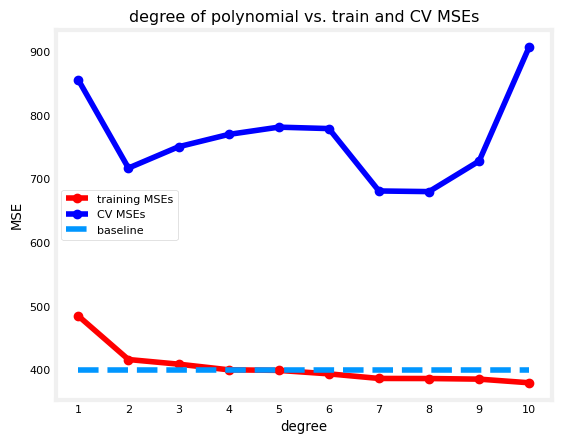

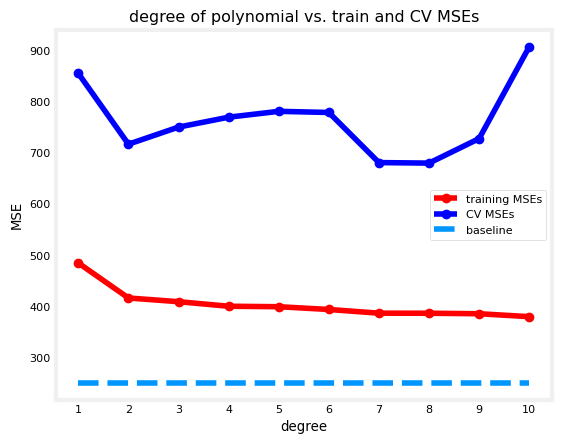

In [6]:
model = LinearRegression()

utils.train_plot_poly(model, X_train, y_train, X_val, y_val, max_degree=10, baseline=400)  # Model performs great with thi baseline
utils.train_plot_poly(model, X_train, y_train, X_val, y_val, max_degree=10, baseline=250)  # Using 250 as a baseline the bias is high


In [9]:
# Collect more data (./data/c2w3_lab2_data2.csv) and ADD MORE FEATURES

X_train, y_train, X_val, y_val, X_test, y_test = utils.prepare_dataset('./data/c2w3_lab2_data2.csv')

print(f'Training set input shape: {X_train.shape} => {X_train.shape[1]} features')
print(f'Training set target shape: {y_train.shape}')
print(f'Cross validation set input shape: {X_val.shape}')
print(f'Cross validation set target shape: {y_val.shape}')

Training set input shape: (60, 2) => 2 features
Training set target shape: (60,)
Cross validation set input shape: (20, 2)
Cross validation set target shape: (20,)


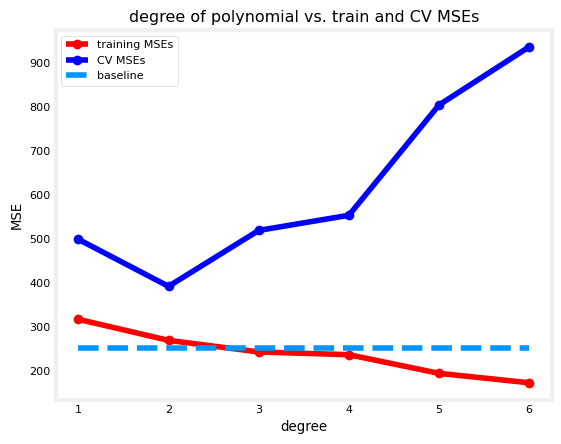

In [13]:
model = LinearRegression()

utils.train_plot_poly(model, X_train, y_train, X_val, y_val, max_degree=6, baseline=250) # Low bias


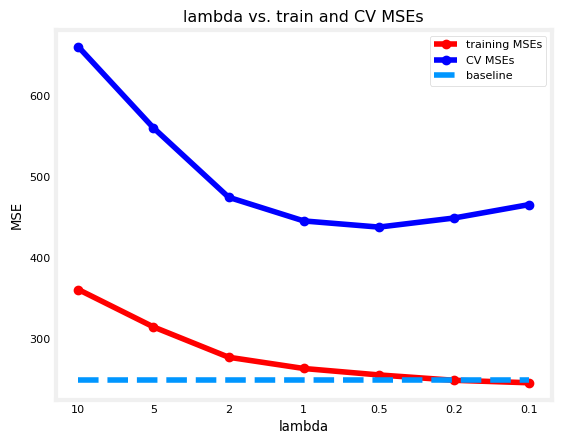

In [14]:
# Introduce regularization to avoid overfitting
reg_params = [10, 5, 2, 1, 0.5, 0.2, 0.1]

# Define degree of polynomial and train for each value of lambda
utils.train_plot_reg_params(reg_params, X_train, y_train, X_val, y_val, degree= 4, baseline=250)

## Fixing high variance

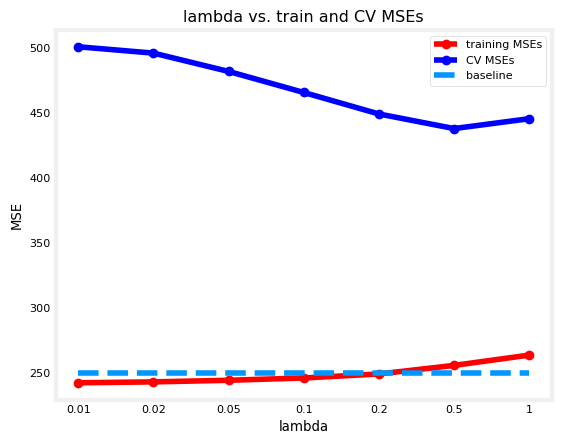

In [15]:
# Define lambdas to plot
reg_params = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

# Define degree of polynomial and train for each value of lambda
utils.train_plot_reg_params(reg_params, X_train, y_train, X_val, y_val, degree= 4, baseline=250)

first 5 rows of the training set with 2 features:
 [[3.75757576e+03 5.49494949e+00]
 [2.87878788e+03 6.70707071e+00]
 [3.54545455e+03 3.71717172e+00]
 [1.57575758e+03 5.97979798e+00]
 [1.66666667e+03 1.61616162e+00]]

first 5 rows of the training set with 3 features (1st column is a random ID):
 [[1.41929130e+07 3.75757576e+03 5.49494949e+00]
 [1.51868310e+07 2.87878788e+03 6.70707071e+00]
 [1.92662630e+07 3.54545455e+03 3.71717172e+00]
 [1.25222490e+07 1.57575758e+03 5.97979798e+00]
 [1.76537960e+07 1.66666667e+03 1.61616162e+00]]



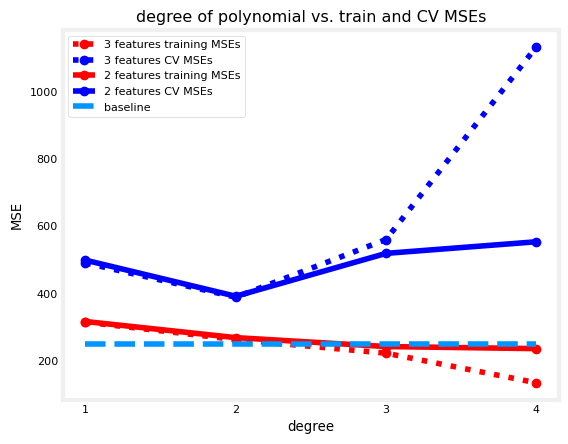

In [17]:
# ADD more FEATURES

# 2-features dataset
x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset('data/c2w3_lab2_data2.csv')

print(f"first 5 rows of the training set with 2 features:\n {x_train[:5]}\n")

# 3-features dataset
x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset('data/c2w3_lab2_data3.csv')

print(f"first 5 rows of the training set with 3 features (1st column is a random ID):\n {x_train[:5]}\n")

model = LinearRegression()

file1 = {'filename':'data/c2w3_lab2_data3.csv', 'label': '3 features', 'linestyle': 'dotted'}
file2 = {'filename':'data/c2w3_lab2_data2.csv', 'label': '2 features', 'linestyle': 'solid'}
files = [file1, file2]

# Train and plot for each dataset
utils.train_plot_diff_datasets(model, files, max_degree=4, baseline=250)

the shape of the entire training set (input) is: (600, 2)
the shape of the entire training set (target) is: (600,)

the shape of the entire cross validation set (input) is: (200, 2)
the shape of the entire cross validation set (target) is: (200,)



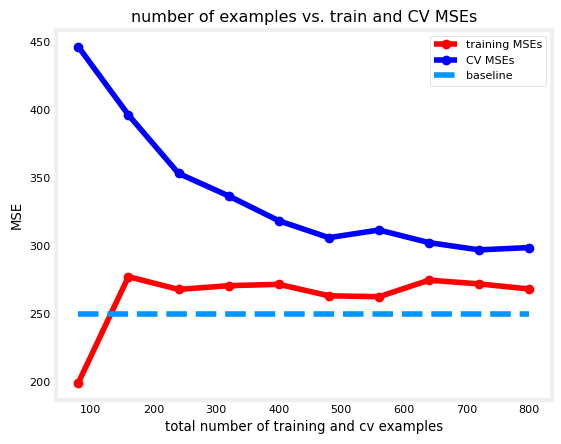

In [18]:
# More training samples

x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset('data/c2w3_lab2_data4.csv')
print(f"the shape of the entire training set (input) is: {x_train.shape}")
print(f"the shape of the entire training set (target) is: {y_train.shape}\n")
print(f"the shape of the entire cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the entire cross validation set (target) is: {y_cv.shape}\n")

# Instantiate the model class
model = LinearRegression()

# Define the degree of polynomial and train the model using subsets of the dataset.
utils.train_plot_learning_curve(model, x_train, y_train, x_cv, y_cv, degree= 4, baseline=250)
